## Problem 5
Problem 5
Given the stock return data in DailyReturns.csv.
- A. Create a routine for calculating an exponentially weighted covariance matrix. If you have a package that calculates it for you, verify it produces the expected results from the testdata folder.
- B. Vary λ. Use PCA and plot the cumulative variance explained of λ in (0,1) by each eigenvalue for each λ chosen.
- C. What does this tell us about the values of λ and the effect it has on the covariance matrix?

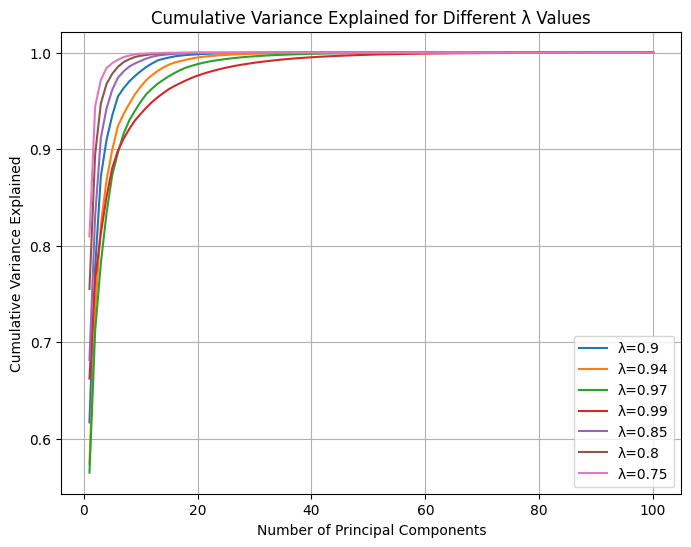

In [9]:
import pandas as pd
import numpy as np

# Read the data
file_path = "DailyReturn.csv"
df = pd.read_csv(file_path)

# Check the first few rows of the data to inspect its format
df.head()

def ewma_cov_matrix(returns, lambda_val):
    """
    Calculate the exponentially weighted covariance matrix (EWMA).
    
    Parameters:
    - returns: Stock return data in DataFrame format, with each column as a stock and each row as a time point
    - lambda_val: Exponentially weighted decay factor (0 < λ < 1)
    
    Returns:
    - EWMA covariance matrix
    """
    mean_returns = returns.mean()  # Calculate the mean
    deviations = returns - mean_returns  # Calculate deviations
    T = len(returns)  # Length of time series

    # Initialize the covariance matrix
    ewma_cov = np.zeros((returns.shape[1], returns.shape[1]))

    # Calculate the EWMA covariance matrix
    for t in range(T):
        weight = (1 - lambda_val) * (lambda_val ** (T - 1 - t))
        ewma_cov += weight * np.outer(deviations.iloc[t], deviations.iloc[t])
    
    return pd.DataFrame(ewma_cov, index=returns.columns, columns=returns.columns)

def pandas_ewma_cov_matrix(returns, lambda_val):
    """
    Compute the exponentially weighted covariance matrix using pandas' ewm method.
    
    Parameters:
    - returns: Stock return data in DataFrame format, with each column as a stock and each row as a time point
    - lambda_val: Exponentially weighted decay factor (0 < λ < 1)
    
    Returns:
    - EWMA covariance matrix
    """
    # Use pandas' ewm function to calculate the weighted return
    ewma_returns = returns.ewm(span=(2 / (1 - lambda_val) - 1)).mean()  # span parameter is related to λ
    
    # Calculate the covariance matrix from the weighted returns
    ewma_cov = ewma_returns.cov()
    
    return ewma_cov

# Choose λ = 0.94 for calculation
lambda_94 = 0.94
returns_data = df.iloc[:, 1:]  # Remove the date column, keeping only the return data

ewma_cov_94 = ewma_cov_matrix(returns_data, lambda_94)
ewma_cov_94.head()

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define different λ values
lambda_values = [0.90, 0.94, 0.97, 0.99, 0.85, 0.80, 0.75]

# Store the PCA results for each λ
pca_results = {}

for lambda_val in lambda_values:
    # Calculate the EWMA covariance matrix
    ewma_cov = ewma_cov_matrix(returns_data, lambda_val)
    
    # Perform PCA decomposition
    pca = PCA()
    pca.fit(ewma_cov)
    
    # Calculate cumulative variance explained ratio
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    pca_results[lambda_val] = cumulative_variance

# Plot the cumulative variance explained curve for different λ values
plt.figure(figsize=(8, 6))

for lambda_val, variance in pca_results.items():
    plt.plot(range(1, len(variance) + 1), variance, label=f"λ={lambda_val}")

plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Cumulative Variance Explained for Different λ Values")
plt.legend()
plt.grid()
plt.show()